# 1. Libraries & Modules

## 1.1. Package Installation

In [1]:
%pip install numpy
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install pillow
%pip install scikit-learn
%pip install tensorflow
%pip install pydot graphviz


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

import warnings
warnings.filterwarnings("ignore")

# 2. Data Preprocessing

## 2.1. Data Preparation

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(
        *[
            (label, os.path.join(tr_path, label, image))
            for label in os.listdir(tr_path)
            if os.path.isdir(os.path.join(tr_path, label))
            for image in os.listdir(os.path.join(tr_path, label))
        ]
    )

    tr_df = pd.DataFrame({"Class Path": class_paths, "Class": classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(
        *[
            (label, os.path.join(ts_path, label, image))
            for label in os.listdir(ts_path)
            if os.path.isdir(os.path.join(ts_path, label))
            for image in os.listdir(os.path.join(ts_path, label))
        ]
    )

    ts_df = pd.DataFrame({"Class Path": class_paths, "Class": classes})
    return ts_df

## 2.2. Data Loading

In [5]:
tr_df = train_df("Datasets/Training")

In [6]:
tr_df

,Class Path,Class
0,Datasets/Training\glioma\Tr-glTr_0000.jpg,glioma
1,Datasets/Training\glioma\Tr-glTr_0001.jpg,glioma
2,Datasets/Training\glioma\Tr-glTr_0002.jpg,glioma
3,Datasets/Training\glioma\Tr-glTr_0003.jpg,glioma
4,Datasets/Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,Datasets/Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,Datasets/Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,Datasets/Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,Datasets/Training\pituitary\Tr-pi_1455.jpg,pituitary


In [7]:
ts_df = test_df("Datasets/Testing")

In [8]:
ts_df

,Class Path,Class
0,Datasets/Testing\glioma\Te-glTr_0000.jpg,glioma
1,Datasets/Testing\glioma\Te-glTr_0001.jpg,glioma
2,Datasets/Testing\glioma\Te-glTr_0002.jpg,glioma
3,Datasets/Testing\glioma\Te-glTr_0003.jpg,glioma
4,Datasets/Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,Datasets/Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,Datasets/Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,Datasets/Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,Datasets/Testing\pituitary\Te-pi_0298.jpg,pituitary


## 2.3. Data Visualization

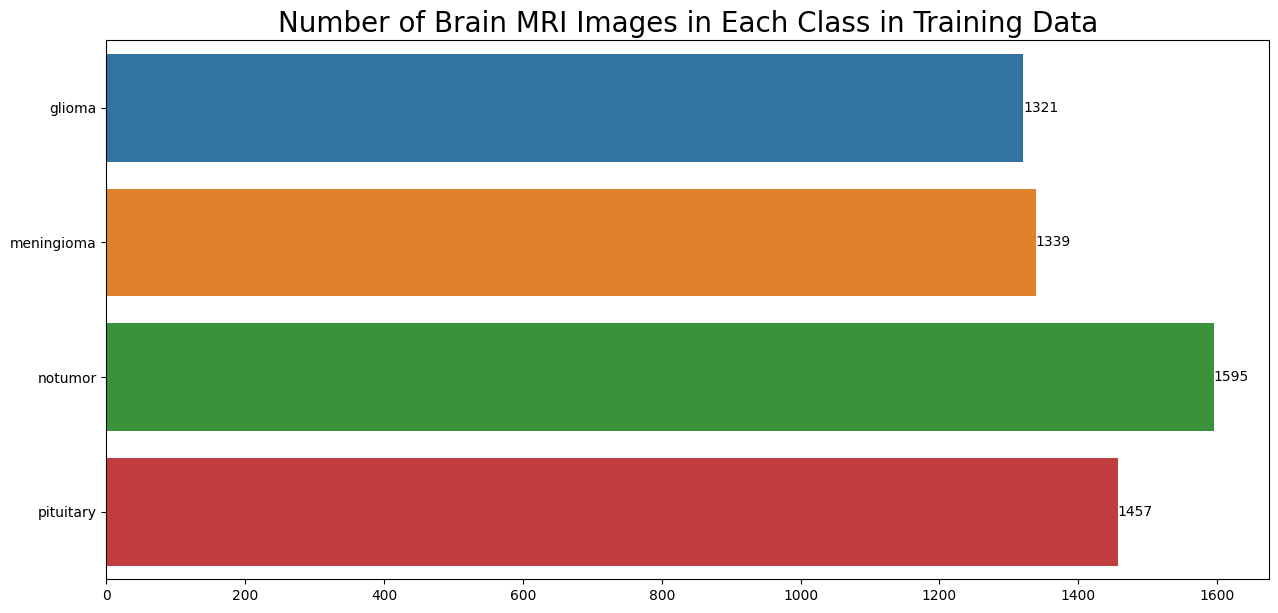

In [9]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, y=tr_df["Class"])

plt.xlabel("")
plt.ylabel("")
plt.title("Number of Brain MRI Images in Each Class in Training Data", fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

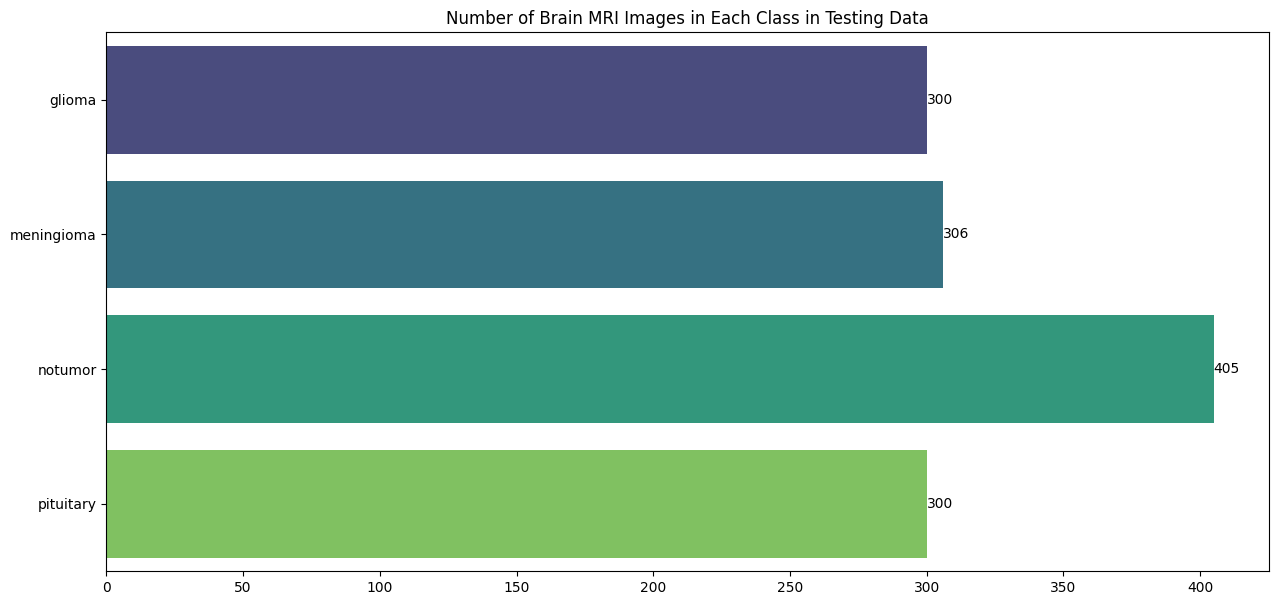

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df["Class"], palette="viridis")

ax.set(
    xlabel="",
    ylabel="",
    title="Number of Brain MRI Images in Each Class in Testing Data",
)
ax.bar_label(ax.containers[0])

plt.show()

## 2.4. Data Splitting

In [11]:
valid_df, ts_df = train_test_split(
    ts_df, train_size=0.5, random_state=20, stratify=ts_df["Class"]
)

In [12]:
valid_df

,Class Path,Class
286,Datasets/Testing\glioma\Te-gl_0286.jpg,glioma
318,Datasets/Testing\meningioma\Te-me_0018.jpg,meningioma
1072,Datasets/Testing\pituitary\Te-pi_0061.jpg,pituitary
373,Datasets/Testing\meningioma\Te-me_0073.jpg,meningioma
109,Datasets/Testing\glioma\Te-gl_0109.jpg,glioma
...,...,...
59,Datasets/Testing\glioma\Te-gl_0059.jpg,glioma
860,Datasets/Testing\notumor\Te-no_0254.jpg,notumor
273,Datasets/Testing\glioma\Te-gl_0273.jpg,glioma
494,Datasets/Testing\meningioma\Te-me_0194.jpg,meningioma


## 2.5. Image Data Generators

In [13]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=(1 / 255), brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=(1 / 255))


tr_gen = _gen.flow_from_dataframe(
    tr_df,
    x_col="Class Path",
    y_col="Class",
    batch_size=batch_size,
    target_size=img_size,
)

valid_gen = _gen.flow_from_dataframe(
    valid_df,
    x_col="Class Path",
    y_col="Class",
    batch_size=batch_size,
    target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col="Class Path",
    y_col="Class",
    batch_size=16,
    target_size=img_size,
    shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## 2.6. Data Samples

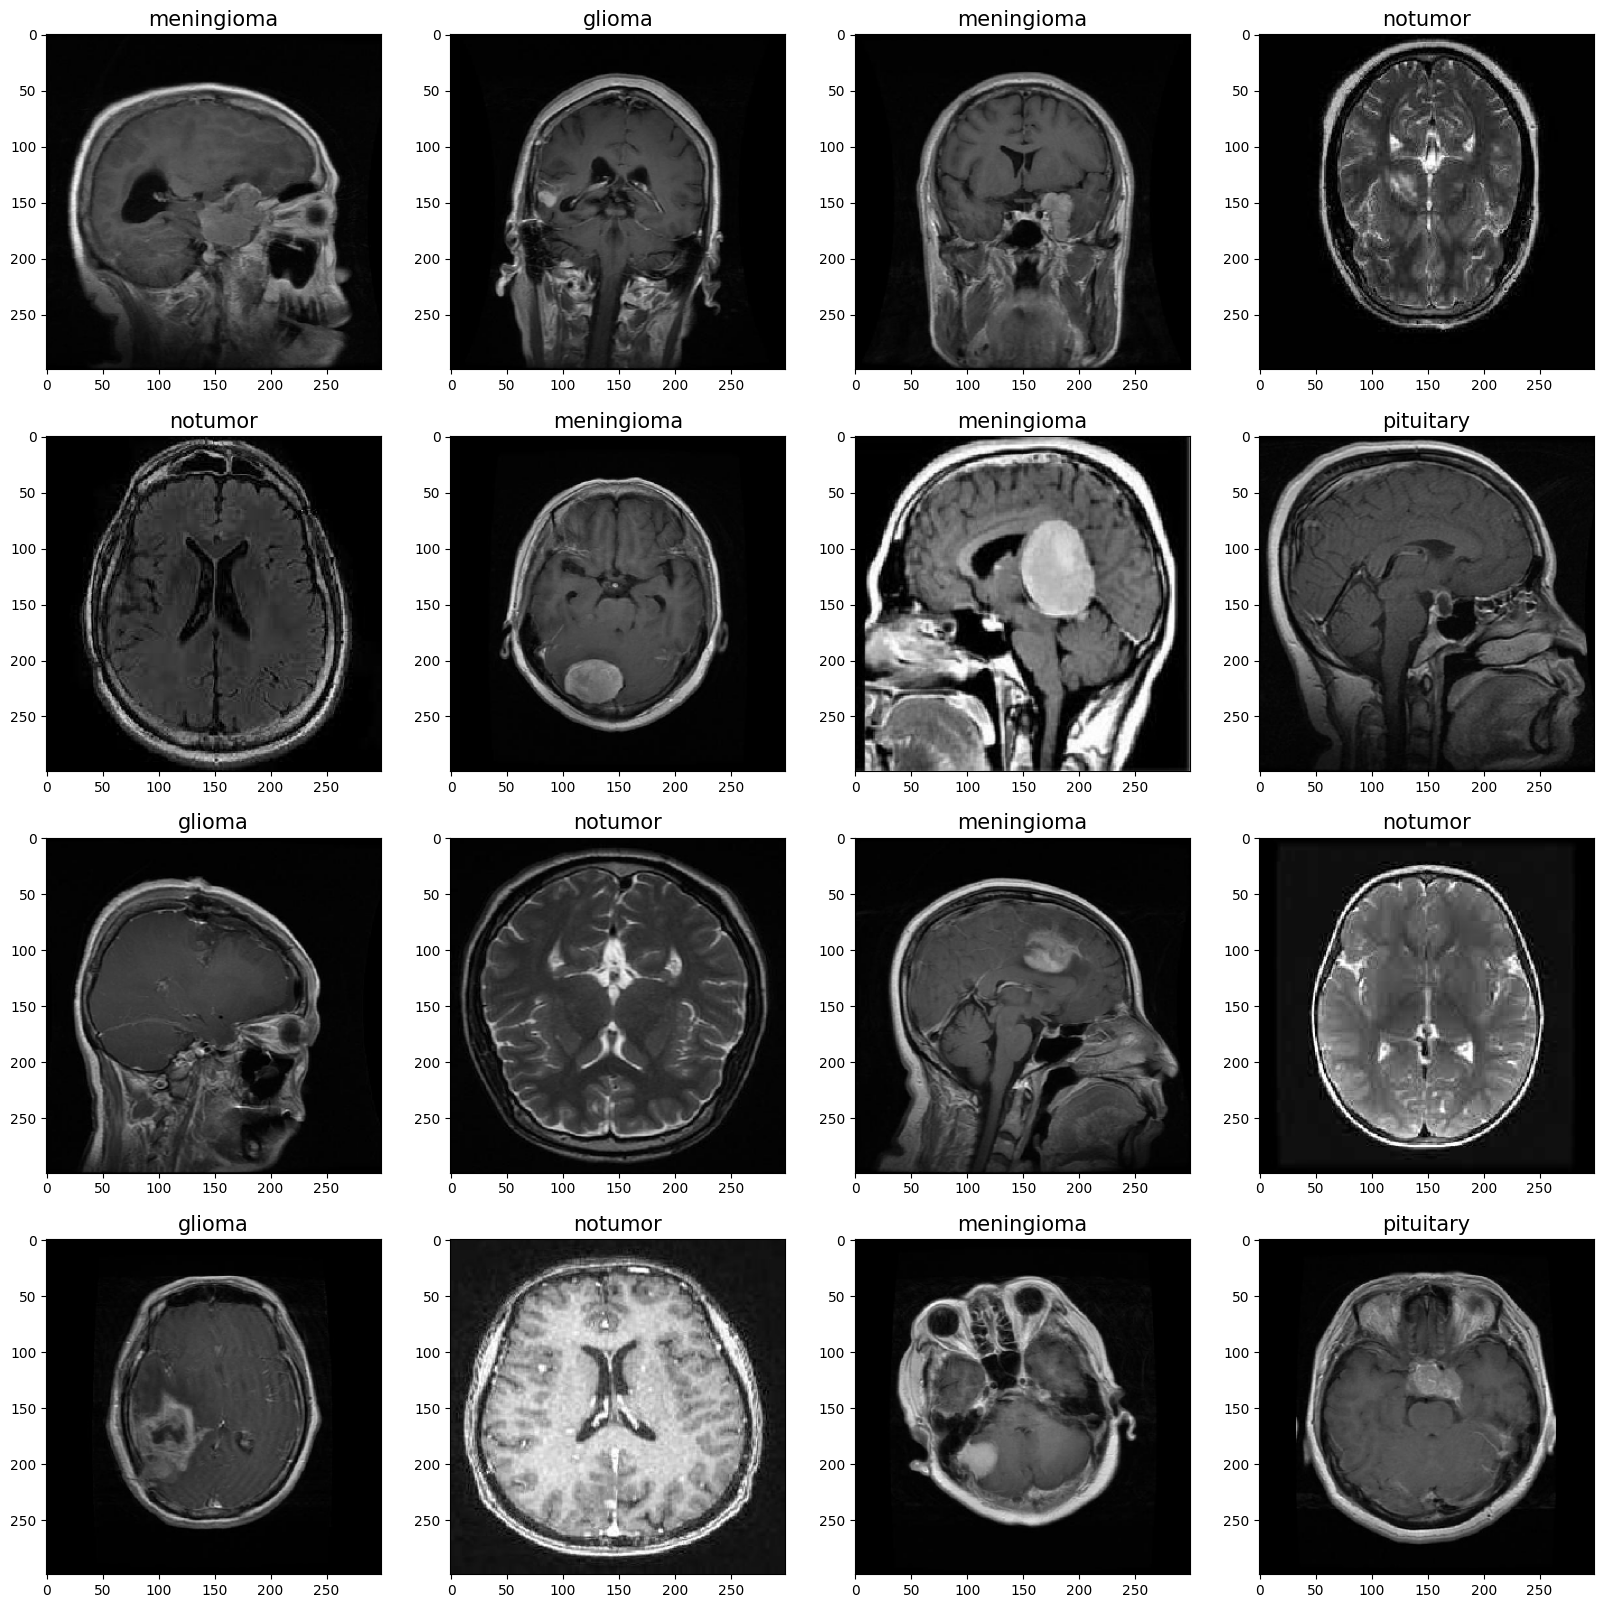

In [14]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, (i + 1))
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color="k", fontsize=15)

plt.show()

# 3. Model Building

## 3.1. Deep Learning Model

In [15]:
img_shape = (299, 299, 3)
base_model = tf.keras.applications.Xception(
    include_top=False, weights="imagenet", input_shape=img_shape, pooling="max"
)

model = Sequential(
    [
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation="relu"),
        Dropout(rate=0.25),
        Dense(4, activation="softmax"),
    ]
)

model.compile(
    Adamax(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy", Precision(), Recall()],
)

## 3.2. Model Summary and Visualization

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,124,268
Trainable params: 21,069,740
No

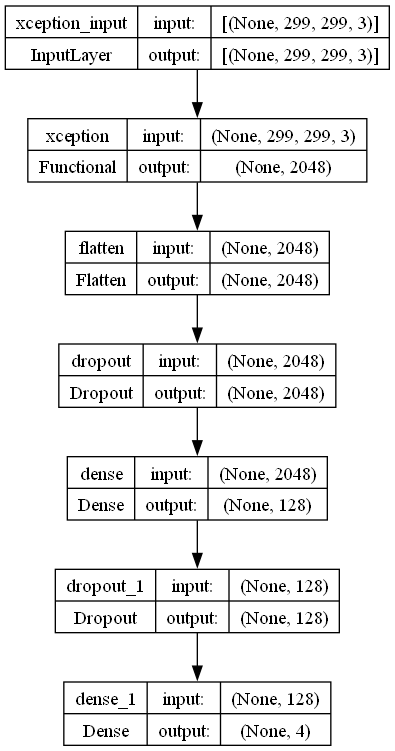

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 4. Training

## 4.1. Model Training

In [18]:
hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen, shuffle=False)

Epoch 1/10
179/179 [==============================] - 6316s 35s/step - loss: 0.6284 - accuracy: 0.7488 - precision: 0.8883 - recall: 0.6446 - val_loss: 0.3076 - val_accuracy: 0.8809 - val_precision: 0.8941 - val_recall: 0.8504
Epoch 2/10
179/179 [==============================] - 5942s 33s/step - loss: 0.1046 - accuracy: 0.9648 - precision: 0.9669 - recall: 0.9622 - val_loss: 0.1192 - val_accuracy: 0.9618 - val_precision: 0.9690 - val_recall: 0.9557
Epoch 3/10
179/179 [==============================] - 6285s 35s/step - loss: 0.0372 - accuracy: 0.9881 - precision: 0.9886 - recall: 0.9872 - val_loss: 0.0841 - val_accuracy: 0.9710 - val_precision: 0.9724 - val_recall: 0.9679
Epoch 4/10
179/179 [==============================] - 5250s 29s/step - loss: 0.0204 - accuracy: 0.9933 - precision: 0.9935 - recall: 0.9930 - val_loss: 0.1617 - val_accuracy: 0.9679 - val_precision: 0.9679 - val_recall: 0.9679
Epoch 5/10
179/179 [==============================] - 5232s 29s/step - loss: 0.0225 - accura

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

## 4.2. Training Metrics Visualization

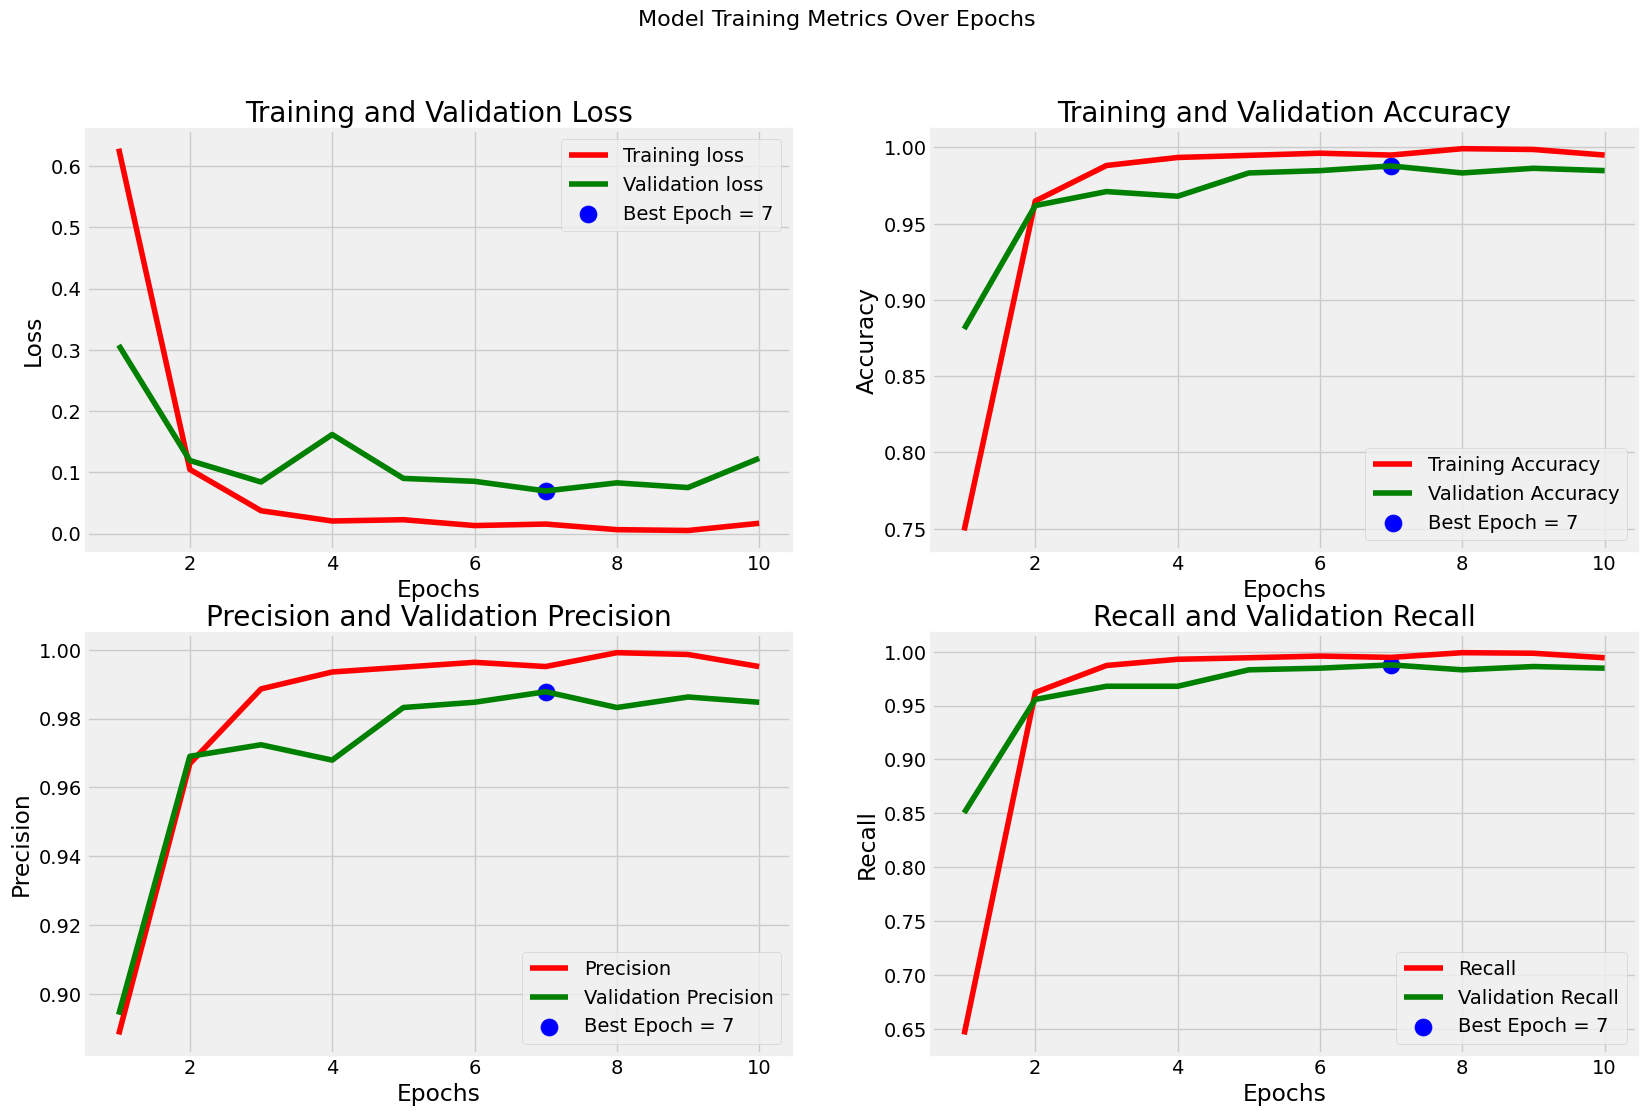

In [20]:
tr_acc = hist.history["accuracy"]
tr_loss = hist.history["loss"]
tr_per = hist.history["precision"]
tr_recall = hist.history["recall"]
val_acc = hist.history["val_accuracy"]
val_loss = hist.history["val_loss"]
val_per = hist.history["val_precision"]
val_recall = hist.history["val_recall"]

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [(i + 1) for i in range(len(tr_acc))]
loss_label = f"Best Epoch = {str(index_loss + 1)}"
acc_label = f"Best Epoch = {str(index_acc + 1)}"
per_label = f"Best Epoch = {str(index_precision + 1)}"
recall_label = f"Best Epoch = {str(index_recall + 1)}"


plt.figure(figsize=(20, 12))
plt.style.use("fivethirtyeight")


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, "r", label="Training loss")
plt.plot(Epochs, val_loss, "g", label="Validation loss")
plt.scatter((index_loss + 1), val_lowest, s=150, c="blue", label=loss_label)
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, "r", label="Training Accuracy")
plt.plot(Epochs, val_acc, "g", label="Validation Accuracy")
plt.scatter((index_acc + 1), acc_highest, s=150, c="blue", label=acc_label)
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, "r", label="Precision")
plt.plot(Epochs, val_per, "g", label="Validation Precision")
plt.scatter((index_precision + 1), per_highest, s=150, c="blue", label=per_label)
plt.title("Precision and Validation Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, "r", label="Recall")
plt.plot(Epochs, val_recall, "g", label="Validation Recall")
plt.scatter((index_recall + 1), recall_highest, s=150, c="blue", label=recall_label)
plt.title("Recall and Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Metrics Over Epochs", fontsize=16)
plt.show()

# 5. Evaluation

## 5.1. Model Evaluation

In [21]:
train_score = model.evaluate(tr_gen, verbose=1)
print()
valid_score = model.evaluate(valid_gen, verbose=1)
print()
test_score = model.evaluate(ts_gen, verbose=1)
print()

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {(train_score[1] * 100):.2f}%")
print()
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {(valid_score[1] * 100):.2f}%")
print()
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {(test_score[1] * 100):.2f}%")

179/179 [==============================] - 1214s 7s/step - loss: 0.0201 - accuracy: 0.9953 - precision: 0.9953 - recall: 0.9953

21/21 [==============================] - 139s 7s/step - loss: 0.1201 - accuracy: 0.9847 - precision: 0.9847 - recall: 0.9847

41/41 [==============================] - 148s 4s/step - loss: 0.0970 - accuracy: 0.9787 - precision: 0.9786 - recall: 0.9771

Train Loss: 0.0201
Train Accuracy: 99.53%

Validation Loss: 0.1201
Validation Accuracy: 98.47%

Test Loss: 0.0970
Test Accuracy: 97.87%


## 5.2. Model Prediction and Evaluation

In [22]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 145s 4s/step


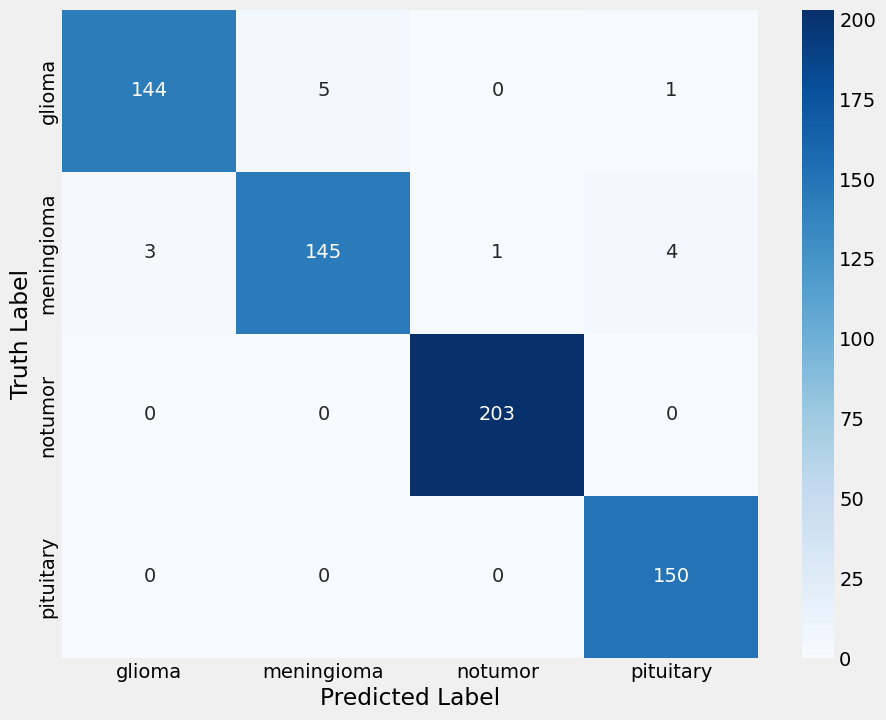

In [23]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted Label")
plt.ylabel("Truth Label")
plt.show()

In [24]:
target_names = ["glioma", "meningioma", "notumor", "pituitary"]
clr = classification_report(ts_gen.classes, y_pred, target_names=target_names)
print(clr)

              precision    recall  f1-score   support

      glioma       0.98      0.96      0.97       150
  meningioma       0.97      0.95      0.96       153
     notumor       1.00      1.00      1.00       203
   pituitary       0.97      1.00      0.98       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



# 6. Model Saving and Loading

In [25]:
model.save("BrainTumorBiomarkersCNN.h5")

In [26]:
model = load_model("BrainTumorBiomarkersCNN.h5")

# 7. Testing

## 7.1. Prediction Description Function

In [27]:
def description(probs):
    prob_idx = 0
    print("Predicted Tumor Type:", end="")
    for i in range(len(probs)):
        if probs[i] > 0:
            prob_idx = prob_idx + 1
            print()
            print(f"{prob_idx}.", end=" ")
            if i == 0:
                print("Glioma")
                print(f"Probability: {(probs[i] * 100):.2f}%")
                print()

                print("a. Overview")
                print("A type of tumor that occurs in the brain and spinal cord.")
                print()
                print(
                    "- Gliomas can occur in the brain and various locations in the nervous system, including the brain stem and spinal column."
                )
                print("- Different types of gliomas cause different symptoms.")
                print(
                    "- Some include headaches, seizures, irritability, vomiting, visual difficulties, and weakness or numbness of the extremities."
                )
                print(
                    "- Treatments include surgery, radiation therapy, chemotherapy, and targeted molecular therapy."
                )
                print()
                print("[!] Rare")
                print("Fewer than 150 thousand cases per year")
                print()
                print("- Requires a medical diagnosis")
                print("- Lab tests or imaging are always required")
                print()

                print("b. Symptoms")
                print("[!] Requires a medical diagnosis")
                print(
                    "Different types of gliomas cause different symptoms. Some include headaches, seizures, irritability, vomiting, visual difficulties, and weakness or numbness of the extremities."
                )
                print()
                print("[!] People may experience:")
                print("- Gastrointestinal: nausea or vomiting")
                print("- Muscular: muscle weakness or weakness of one side of the body")
                print("- Visual: double vision or vision disorder")
                print("- Also common: headache, memory impairment, or seizure")
                print()

                print("c. Treatments")
                print("Note: Treatment depends on the severity")
                print(
                    "A small, slow-growing meningioma that is not causing signs or symptoms may not require treatment. When required, treatment might involve surgery or radiation."
                )
                print()
                print("[!] Medication")
                print("- Chemotherapy")
                print("Unwanted reactions to drugs given to kill cancer cells.")
                print()
                print("[!] Medical Procedure")
                print("- Stereotactic Radiation Therapy")
                print(
                    "Radiation therapy aims for several energy beams at different angles to precisely target a tumor."
                )
                print("- Radiation Therapy")
                print(
                    "Treatment that uses X-rays and other high-energy rays to kill abnormal cells."
                )
                print()

                print("d. Specialists")
                print("- Radiation Oncology")
                print("Treats and manages cancer by prescribing radiation therapy.")
                print("- Neurology")
                print("Treats nervous system disorders.")
                print("- Neurosurgery")
                print("Specialises in nervous system disorders.")
                print("- Oncology")
                print("Specialises in cancer.")
                print("- Primary Care")
                print("Prevents, diagnoses, and treats diseases.")
                print()
            if i == 1:
                print("Meningioma")
                print(f"Probability: {(probs[i] * 100):.2f}%")
                print()

                print("a. Overview")
                print(
                    "A usually non-cancerous tumor that arises from the membranes surrounding the brain and spinal cord."
                )
                print()
                print(
                    "- It is not clear what causes a meningioma. Radiation therapy, female hormones, and genetics may play a role. In most cases, the condition is non-cancerous."
                )
                print(
                    "- Symptoms may include changes in vision, headaches, hearing loss, and seizures."
                )
                print(
                    "- A small, slow-growing meningioma that is not causing signs or symptoms may not require treatment. When required, treatment might involve surgery or radiation."
                )
                print()
                print("[!] Rare")
                print("Fewer than 150 thousand cases per year")
                print()
                print("- Treatable by a medical professional")
                print("- Requires a medical diagnosis")
                print("- Lab tests or imaging are always required")
                print("- Chronic: can last for years or be lifelong")
                print()

                print("b. Symptoms")
                print("[!] Requires a medical diagnosis")
                print(
                    "Symptoms may include changes in vision, headaches, hearing loss, and seizures."
                )
                print()
                print("[!] People may experience:")
                print("- Visual: double vision or vision loss")
                print("- Eyes: swelling of the optic disc or unequal pupils")
                print("- Also common: headache, impaired coordination, or seizure")
                print()

                print("c. Treatments")
                print("Note: Treatment depends on stage")
                print(
                    "Treatments include surgery, radiation therapy, chemotherapy, and targeted molecular therapy."
                )
                print()
                print("[!] Supportive Care")
                print("- Monitoring")
                print("Regular follow-up to evaluate for improvement.")
                print()
                print("[!] Surgery")
                print("- Craniotomy")
                print(
                    "Brain surgery in which a piece of bone is removed from the skull."
                )
                print("- Microsurgery")
                print(
                    "Surgery is performed on very small blood vessels and nerves using a microscope."
                )
                print()
                print("[!] Medical Procedure")
                print("- Radiation Therapy")
                print(
                    "Treatment that uses X-rays and other high-energy rays to kill abnormal cells."
                )
                print()

                print("d. Specialists")
                print("- Neurosurgery")
                print("Specialises in nervous system disorders.")
                print("- Radiation Oncology")
                print("Treats and manages cancer by prescribing radiation therapy.")
                print("- Neurology")
                print("Treats nervous system disorders.")
                print("- Oncology")
                print("Specialises in cancer.")
                print()
            if i == 2:
                print("No Tumor")
                print(f"Probability: {(probs[i] * 100):.2f}%")
                print()
            if i == 3:
                print("Pituitary Adenoma")
                print("Also called: Pituitary Neuroendocrine Tumor")
                print(f"Probability: {(probs[i] * 100):.2f}%")
                print()

                print("a. Overview")
                print(
                    "Non-cancerous tumors in the pituitary gland that do not spread beyond the skull."
                )
                print()
                print(
                    "- The pituitary gland is in the skull, below the brain, and above the nasal passages. A large tumor can press upon and damage the brain and nerves."
                )
                print(
                    "- Vision changes or headaches are symptoms. In some cases, hormones can also be affected, interfering with menstrual cycles and causing sexual dysfunction."
                )
                print(
                    "- Treatments include surgery and medication to block excess hormone production or shrink the tumor. In some cases, radiation may also be used."
                )
                print()
                print("[!] Common")
                print("More than 150 thousand cases per year")
                print()
                print("- Treatable by a medical professional")
                print("- Requires a medical diagnosis")
                print("- Lab tests or imaging are always required")
                print()

                print("b. Symptoms")
                print("[!] Requires a medical diagnosis")
                print(
                    "Vision changes or headaches are symptoms. In some cases, hormones can also be affected, interfering with menstrual cycles and causing sexual dysfunction."
                )
                print()
                print("[!] People may experience:")
                print(
                    "- Common symptoms: galactorrhea, headache, irregular menstruation, or vision disorder"
                )
                print()

                print("c. Treatments")
                print("Note: Treatment depends on severity")
                print(
                    "Treatments include surgery and medication to block excess hormone production or shrink the tumor. In some cases, radiation may also be used."
                )
                print()
                print("[!] Supportive Care")
                print("- Watchful Waiting")
                print(
                    "Monitoring a medical condition instead of taking action right away."
                )
                print()
                print("[!] Medication")
                print("- Dopamine Promoter")
                print("Stimulates dopamine receptors in the brain.")
                print("- Steroid")
                print(
                    "Modifies or simulates hormone effects, often to reduce inflammation or for tissue growth and repair."
                )
                print()
                print("[!] Surgery")
                print("- Transsphenoidal Surgery")
                print(
                    "Surgery is performed through the nose and sinus cavity to remove brain tumours."
                )
                print()

                print("d. Specialists")
                print("- Neurosurgery")
                print("Specialises in nervous system disorders.")
                print("- Radiation Oncology")
                print("Treats and manages cancer by prescribing radiation therapy.")
                print("- Neurology")
                print("Treats nervous system disorders.")
                print("- Oncology")
                print("Specialises in cancer.")
                print()

## 7.2. Prediction

In [28]:
def predict(img_path):
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel("Probability", fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")
    plt.show()
    description(np.round(probs, 2))

## 7.3. Individual Predictions

1/1 [==============================] - 1s 1s/step


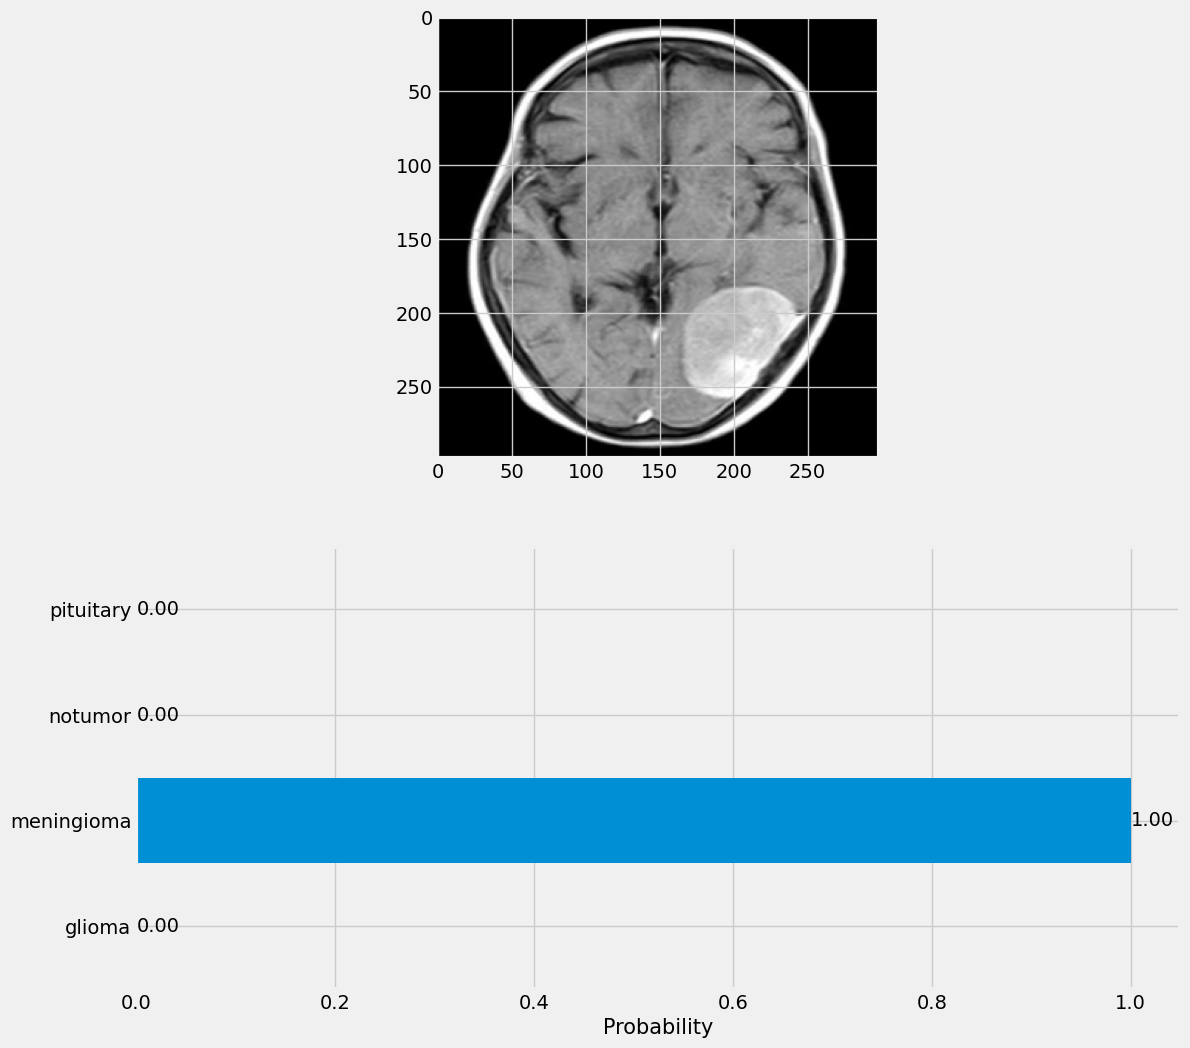

Predicted Tumor Type:
1. Meningioma
Probability: 100.00%

a. Overview
A usually non-cancerous tumor that arises from the membranes surrounding the brain and spinal cord.

- It is not clear what causes a meningioma. Radiation therapy, female hormones, and genetics may play a role. In most cases, the condition is non-cancerous.
- Symptoms may include changes in vision, headaches, hearing loss, and seizures.
- A small, slow-growing meningioma that is not causing signs or symptoms may not require treatment. When required, treatment might involve surgery or radiation.

[!] Rare
Fewer than 150 thousand cases per year

- Treatable by a medical professional
- Requires a medical diagnosis
- Lab tests or imaging are always required
- Chronic: can last for years or be lifelong

b. Symptoms
[!] Requires a medical diagnosis
Symptoms may include changes in vision, headaches, hearing loss, and seizures.

[!] People may experience:
- Visual: double vision or vision loss
- Eyes: swelling of the optic d

In [29]:
predict("Datasets/Testing/meningioma/Te-meTr_0004.jpg")

1/1 [==============================] - 0s 233ms/step


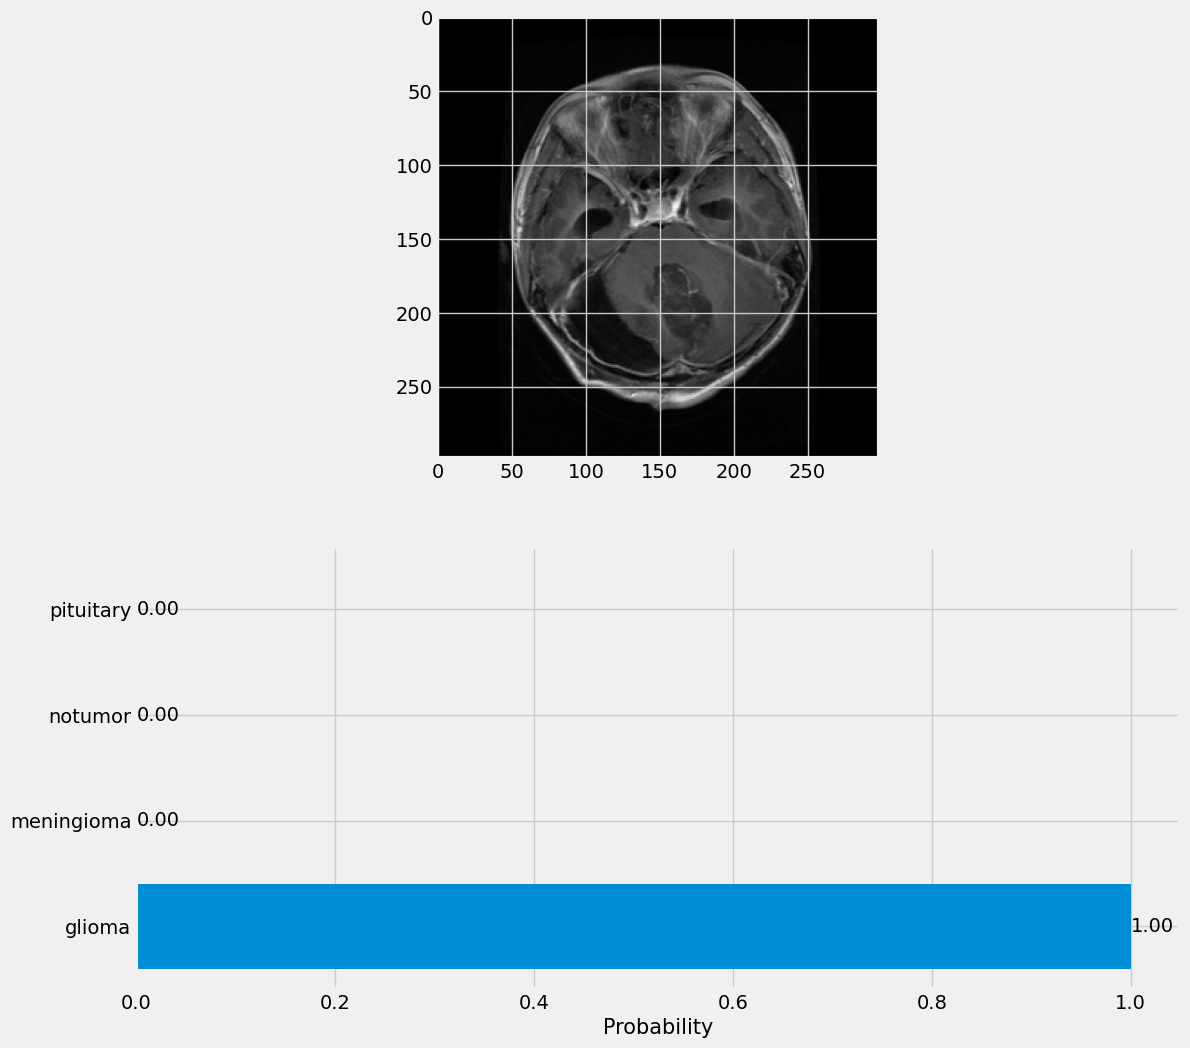

Predicted Tumor Type:
1. Glioma
Probability: 100.00%

a. Overview
A type of tumor that occurs in the brain and spinal cord.

- Gliomas can occur in the brain and various locations in the nervous system, including the brain stem and spinal column.
- Different types of gliomas cause different symptoms.
- Some include headaches, seizures, irritability, vomiting, visual difficulties, and weakness or numbness of the extremities.
- Treatments include surgery, radiation therapy, chemotherapy, and targeted molecular therapy.

[!] Rare
Fewer than 150 thousand cases per year

- Requires a medical diagnosis
- Lab tests or imaging are always required

b. Symptoms
[!] Requires a medical diagnosis
Different types of gliomas cause different symptoms. Some include headaches, seizures, irritability, vomiting, visual difficulties, and weakness or numbness of the extremities.

[!] People may experience:
- Gastrointestinal: nausea or vomiting
- Muscular: muscle weakness or weakness of one side of the body

In [30]:
predict("Datasets/Testing/glioma/Te-glTr_0000.jpg")

1/1 [==============================] - 0s 215ms/step


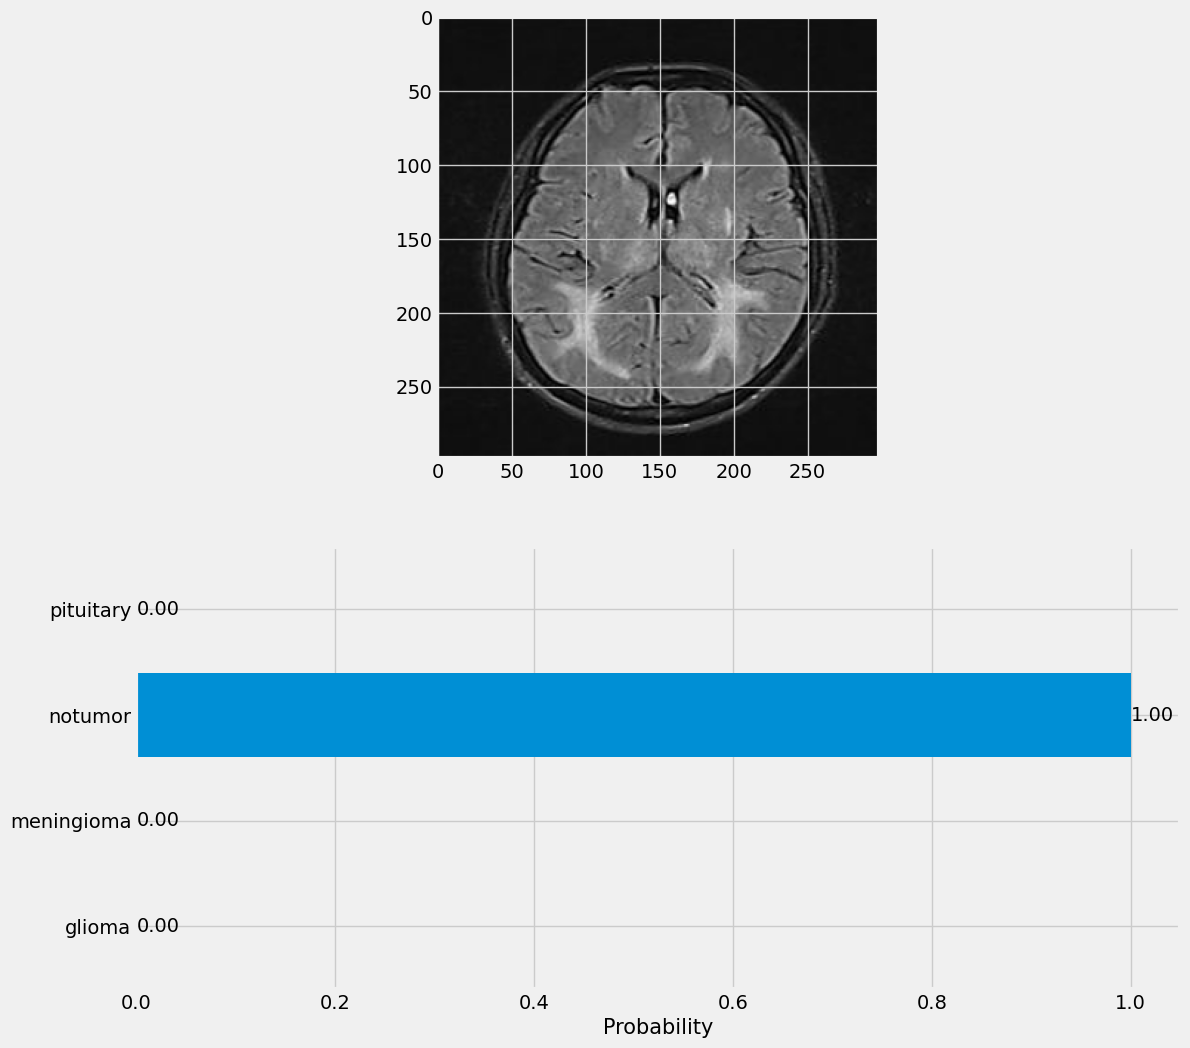

Predicted Tumor Type:
1. No Tumor
Probability: 100.00%



In [31]:
predict("Datasets/Testing/notumor/Te-noTr_0001.jpg")

1/1 [==============================] - 0s 179ms/step


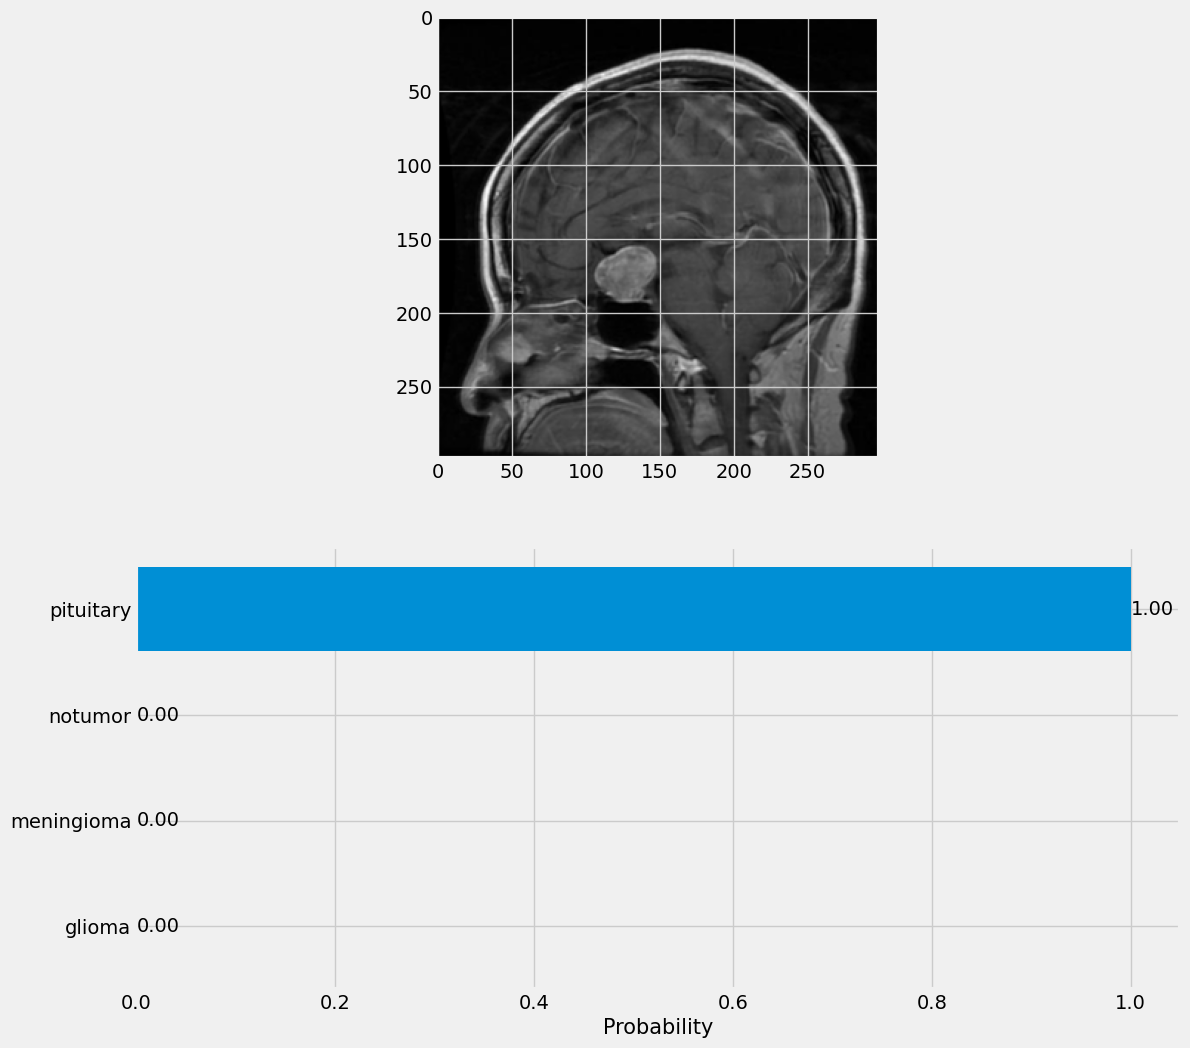

Predicted Tumor Type:
1. Pituitary Adenoma
Also called: Pituitary Neuroendocrine Tumor
Probability: 100.00%

a. Overview
Non-cancerous tumors in the pituitary gland that do not spread beyond the skull.

- The pituitary gland is in the skull, below the brain, and above the nasal passages. A large tumor can press upon and damage the brain and nerves.
- Vision changes or headaches are symptoms. In some cases, hormones can also be affected, interfering with menstrual cycles and causing sexual dysfunction.
- Treatments include surgery and medication to block excess hormone production or shrink the tumor. In some cases, radiation may also be used.

[!] Common
More than 150 thousand cases per year

- Treatable by a medical professional
- Requires a medical diagnosis
- Lab tests or imaging are always required

b. Symptoms
[!] Requires a medical diagnosis
Vision changes or headaches are symptoms. In some cases, hormones can also be affected, interfering with menstrual cycles and causing sexual 

In [32]:
predict("Datasets/Testing/pituitary/Te-piTr_0008.jpg")